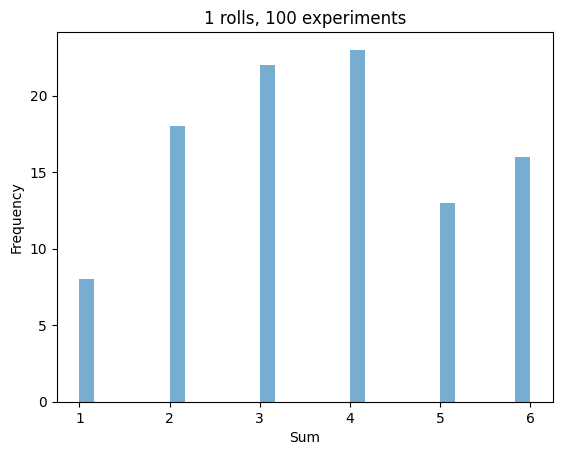

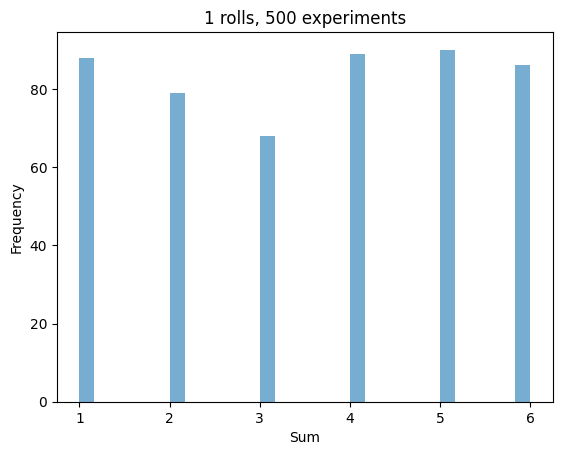

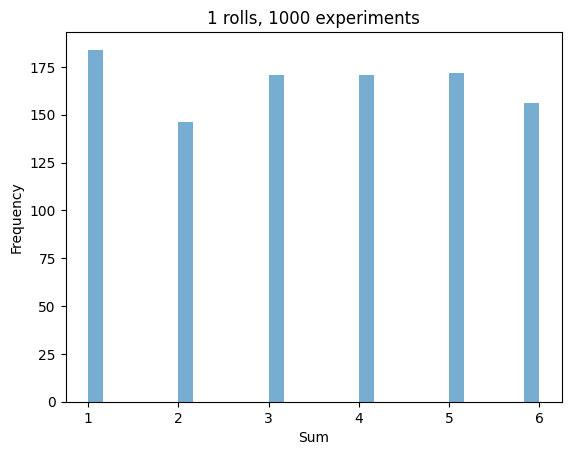

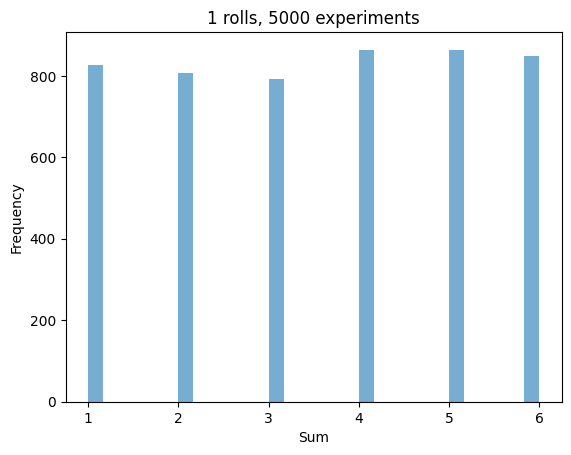

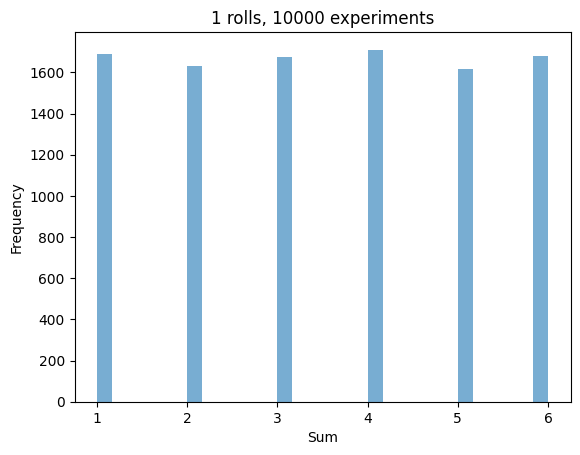

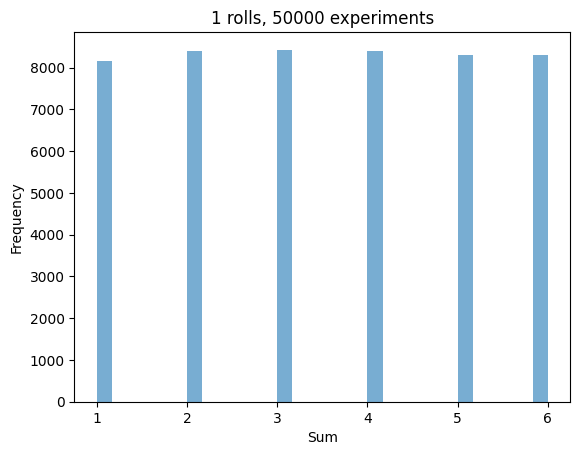

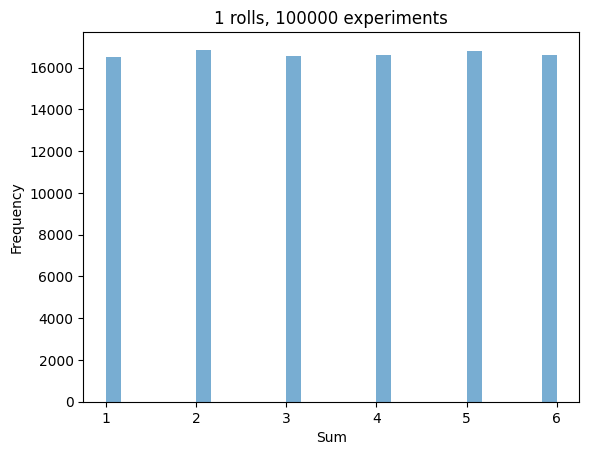

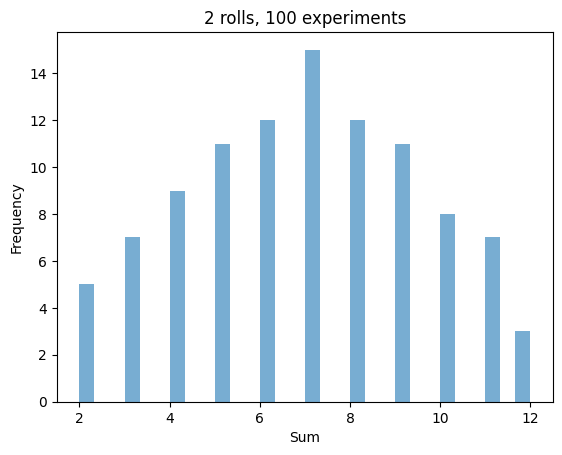

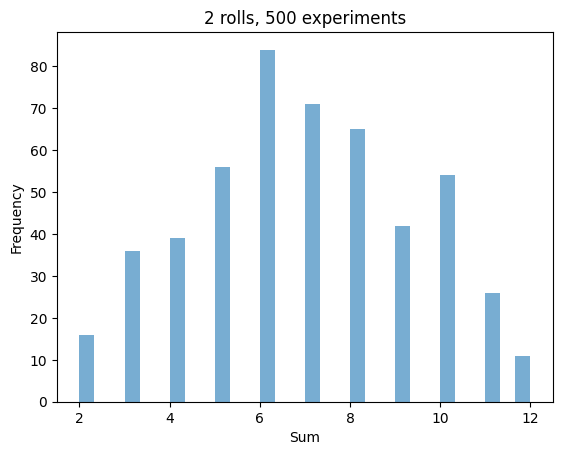

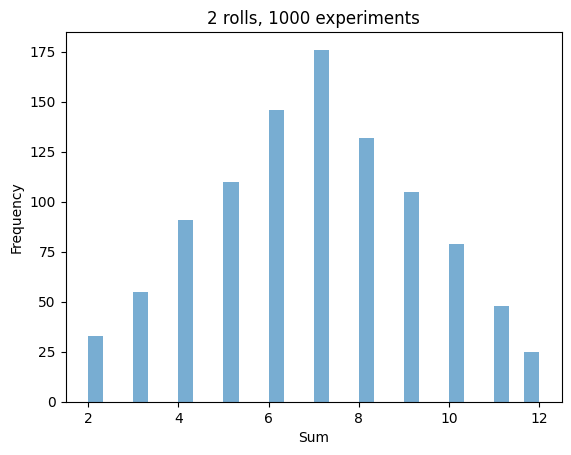

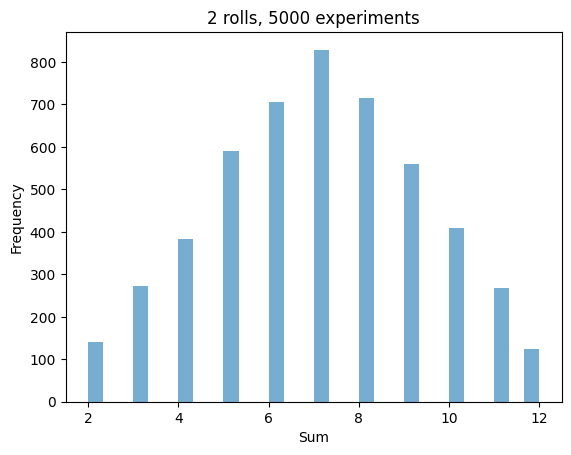

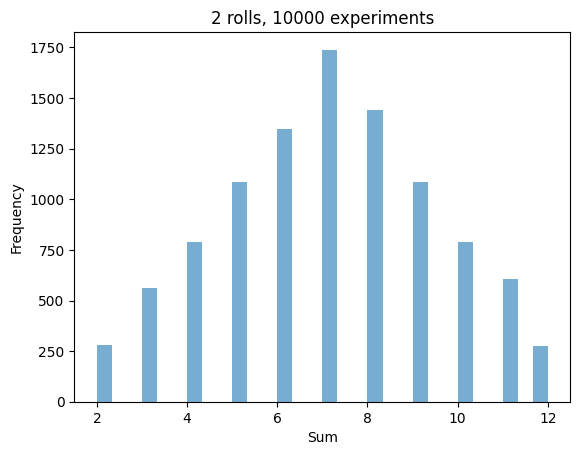

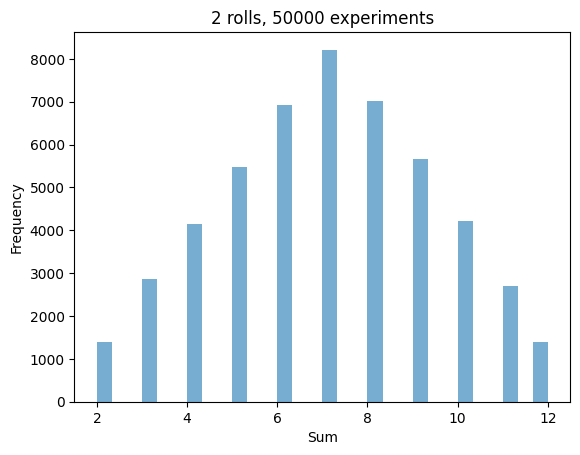

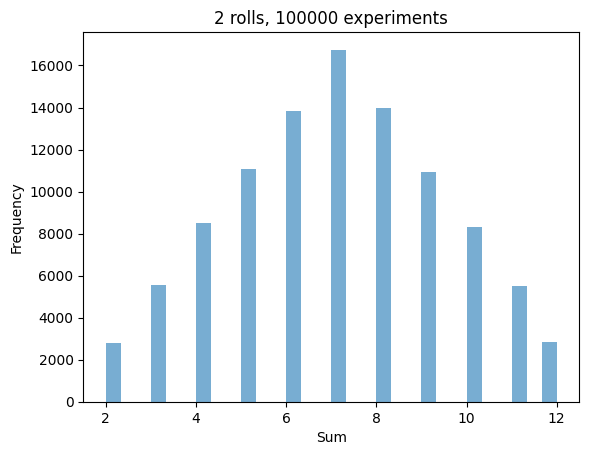

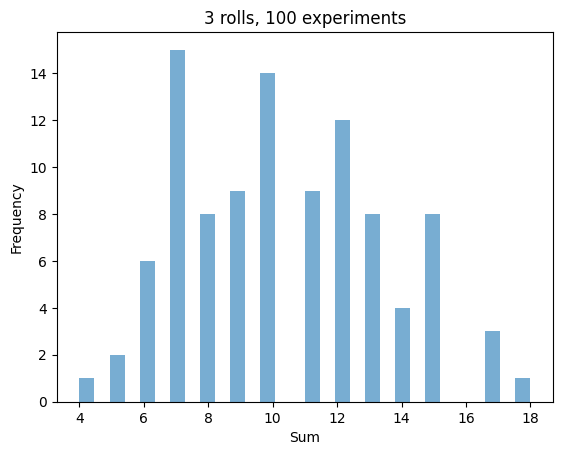

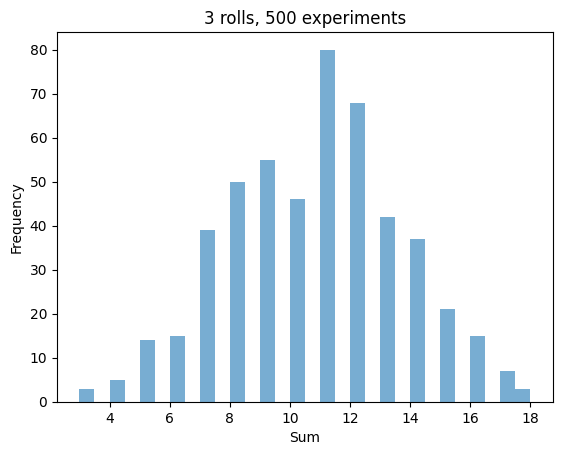

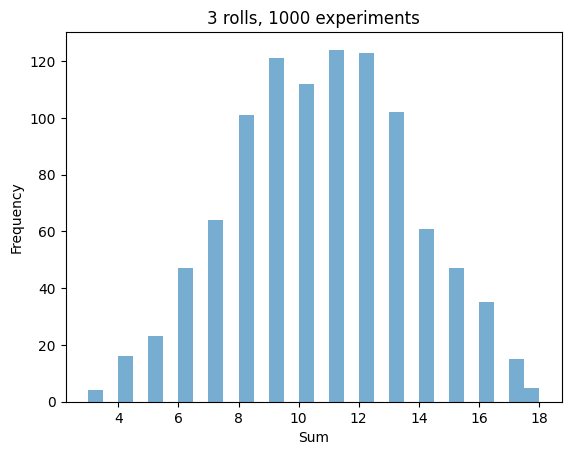

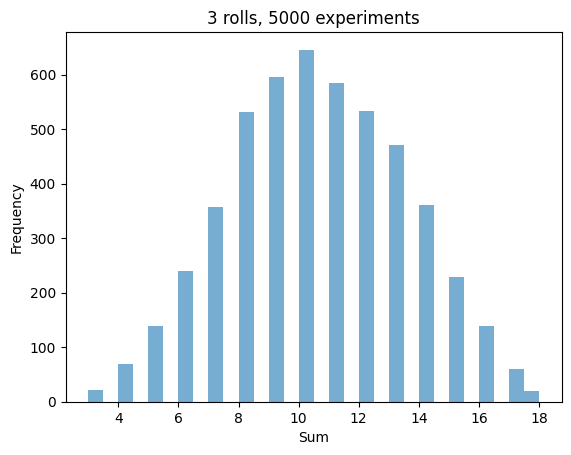

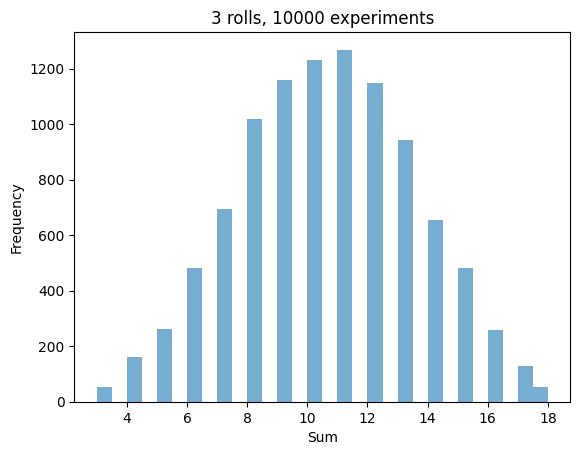

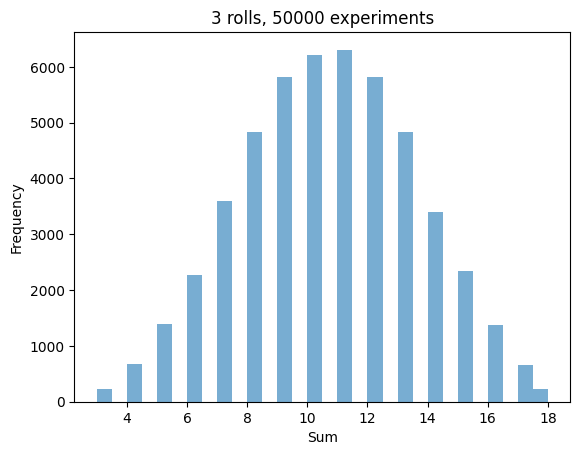

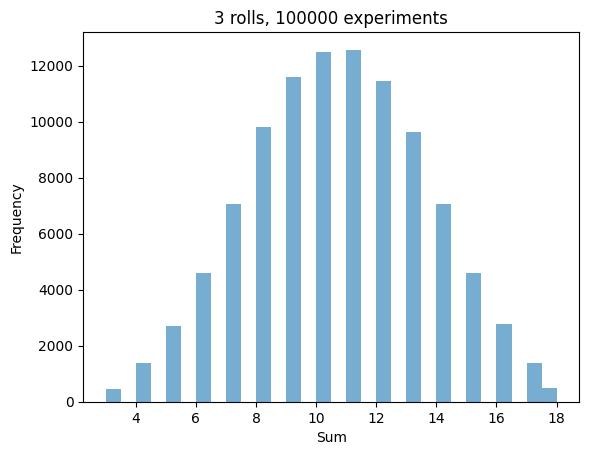

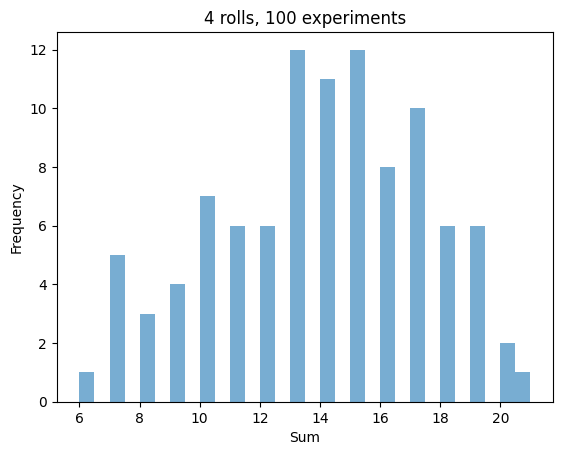

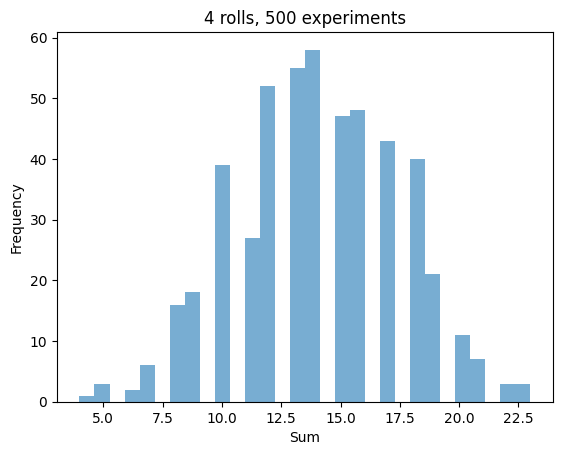

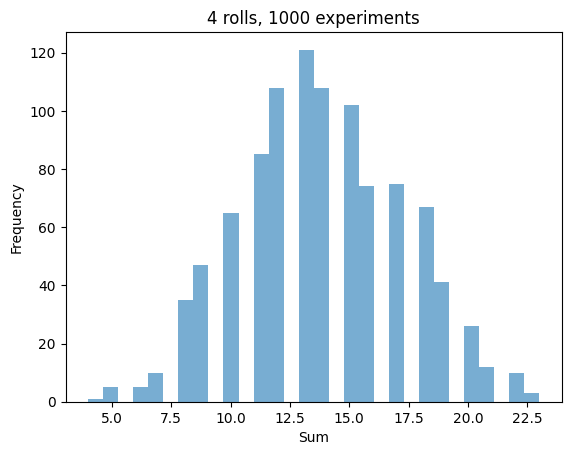

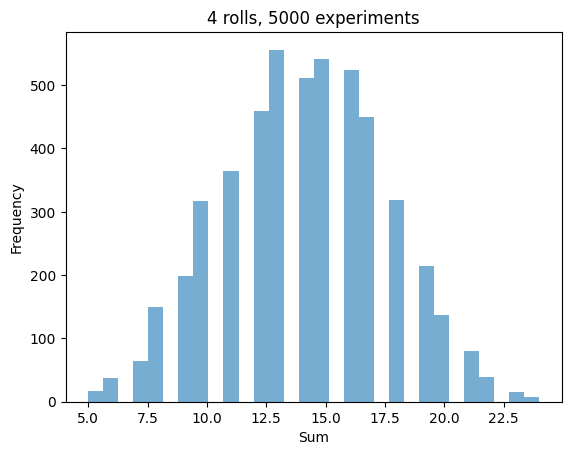

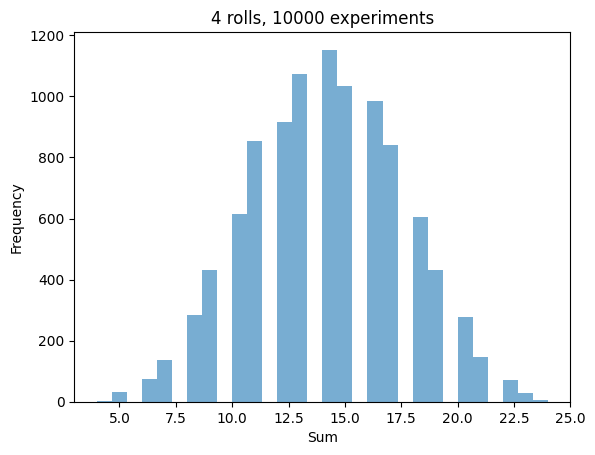

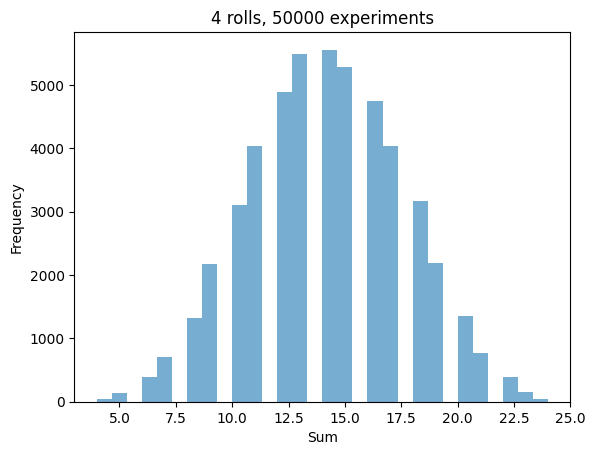

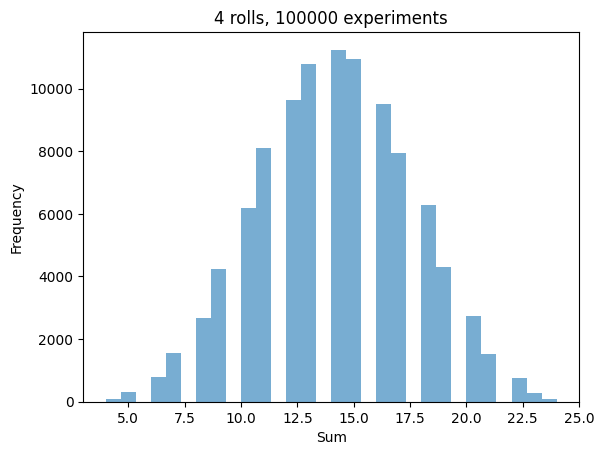

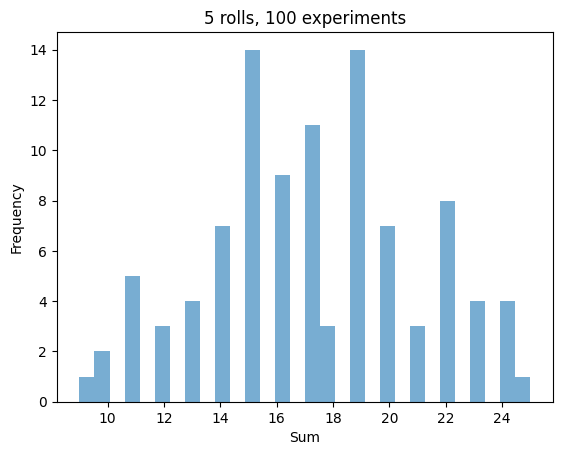

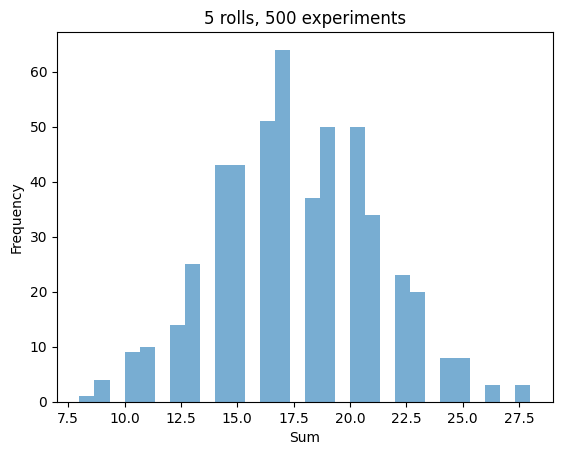

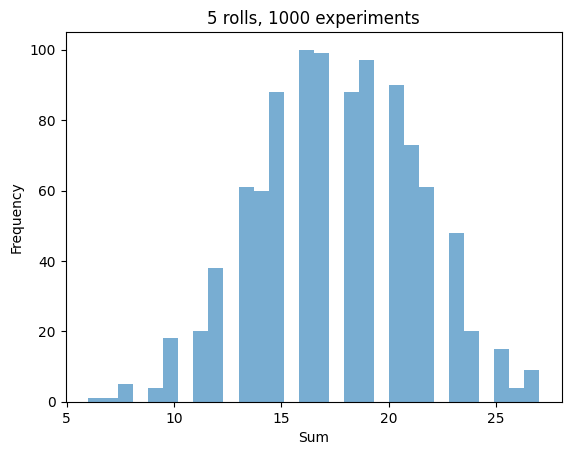

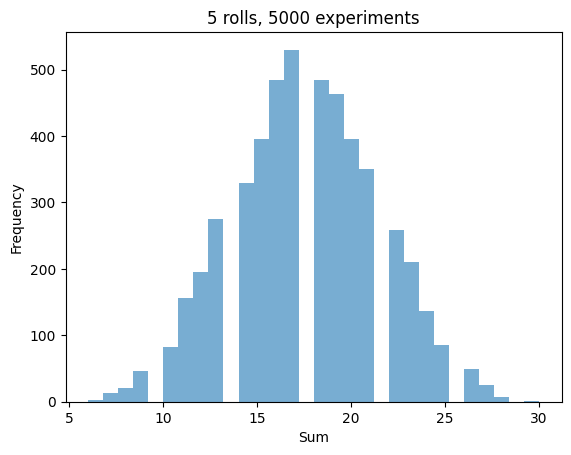

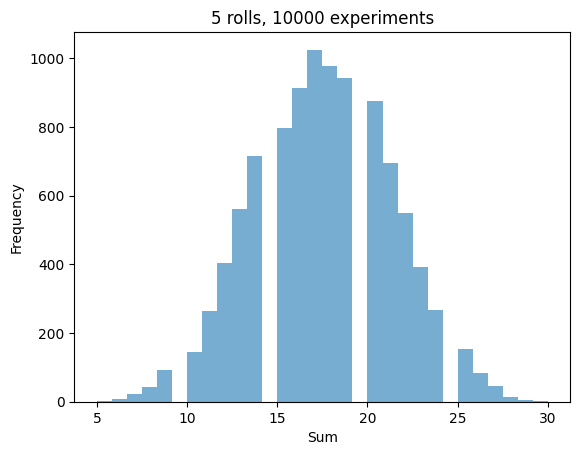

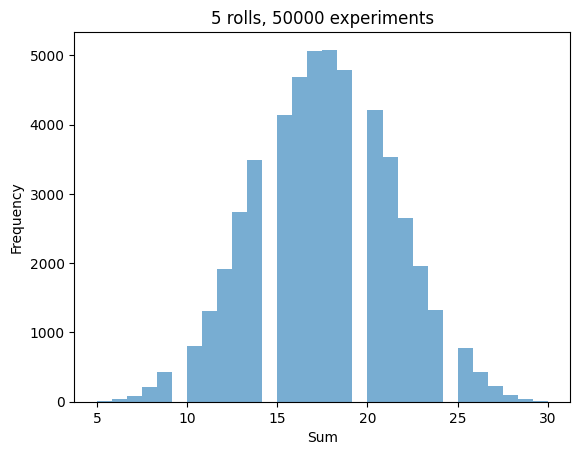

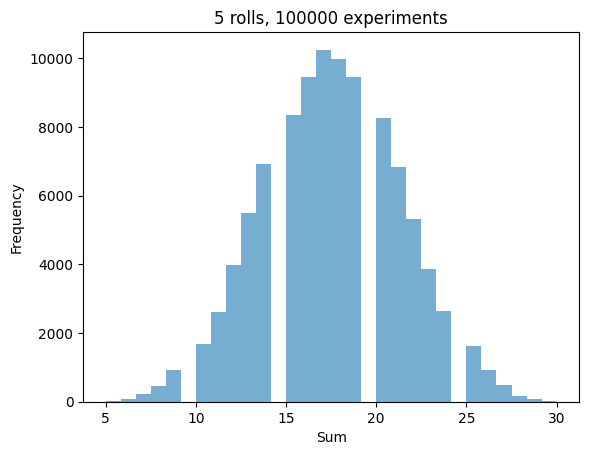

Rolls=1
  Experiments=100, Mean=3.63, Var=2.29
  Experiments=500, Mean=3.54, Var=3.01
  Experiments=1000, Mean=3.47, Var=2.93
  Experiments=5000, Mean=3.54, Var=2.93
  Experiments=10000, Mean=3.50, Var=2.92
  Experiments=50000, Mean=3.50, Var=2.90
  Experiments=100000, Mean=3.50, Var=2.91
Rolls=2
  Experiments=100, Mean=6.87, Var=6.87
  Experiments=500, Mean=6.87, Var=6.07
  Experiments=1000, Mean=6.87, Var=5.75
  Experiments=5000, Mean=6.99, Var=5.69
  Experiments=10000, Mean=7.03, Var=5.83
  Experiments=50000, Mean=7.00, Var=5.85
  Experiments=100000, Mean=6.99, Var=5.84
Rolls=3
  Experiments=100, Mean=10.32, Var=9.52
  Experiments=500, Mean=10.61, Var=8.52
  Experiments=1000, Mean=10.57, Var=8.88
  Experiments=5000, Mean=10.42, Var=8.73
  Experiments=10000, Mean=10.44, Var=8.81
  Experiments=50000, Mean=10.49, Var=8.70
  Experiments=100000, Mean=10.50, Var=8.73
Rolls=4
  Experiments=100, Mean=13.80, Var=12.16
  Experiments=500, Mean=14.05, Var=11.77
  Experiments=1000, Mean=13.83, V

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def roll_die_sum(n_rolls, n_exp):
    results = [np.sum(np.random.randint(1, 7, size=n_rolls)) for _ in range(n_exp)]
    return np.array(results)

experiments = [100, 500, 1000, 5000, 10000, 50000, 100000]
results_q1 = {}

for rolls in range(1, 6): 
    results_q1[rolls] = {}
    for exp in experiments:
        data = roll_die_sum(rolls, exp)
        results_q1[rolls][exp] = (np.mean(data), np.var(data))
        plt.hist(data, bins=30, alpha=0.6)
        plt.title(f"{rolls} rolls, {exp} experiments")
        plt.xlabel("Sum")
        plt.ylabel("Frequency")
        plt.show()

for rolls in results_q1:
    print(f"Rolls={rolls}")
    for exp in results_q1[rolls]:
        mean, var = results_q1[rolls][exp]
        print(f"  Experiments={exp}, Mean={mean:.2f}, Var={var:.2f}")


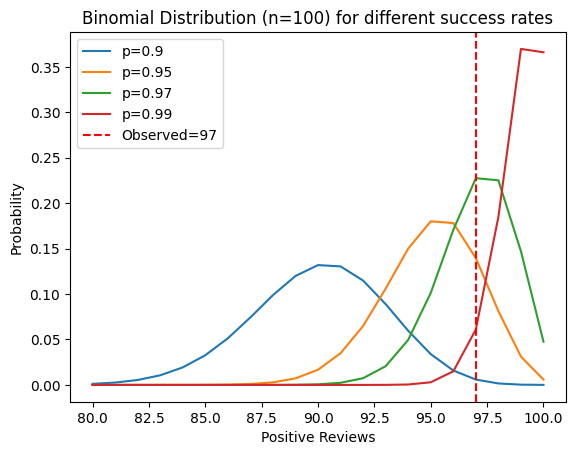

In [2]:

from scipy.stats import binom

n = 100
observed_success = 97
p_values = [0.90, 0.95, 0.97, 0.99]

x = np.arange(80, 101)
for p in p_values:
    pmf = binom.pmf(x, n, p)
    plt.plot(x, pmf, label=f"p={p}")
plt.axvline(observed_success, color='r', linestyle='--', label="Observed=97")
plt.title("Binomial Distribution (n=100) for different success rates")
plt.xlabel("Positive Reviews")
plt.ylabel("Probability")
plt.legend()
plt.show()


In [3]:

import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris, load_wine
from scipy.stats import entropy

# Helper
def column_entropy(series, bins=10):
    if series.dtype == "object" or series.dtype.name == "category":
        counts = series.value_counts(normalize=True)
    else:
        counts, _ = np.histogram(series.dropna(), bins=bins, density=True)
        counts = counts / counts.sum()
    return entropy(counts, base=2)

# Iris
iris = load_iris(as_frame=True)
iris_df = iris.frame
print("Iris Entropy:")
for col in iris_df.columns:
    print(f" {col}: {column_entropy(iris_df[col]):.4f}")

# Wine
wine = load_wine(as_frame=True)
wine_df = wine.frame
print("\nWine Entropy:")
for col in wine_df.columns:
    print(f" {col}: {column_entropy(wine_df[col]):.4f}")

# Titanic
titanic = sns.load_dataset("titanic")
print("\nTitanic Entropy:")
for col in titanic.columns:
    try:
        print(f" {col}: {column_entropy(titanic[col]):.4f}")
    except Exception as e:
        pass


Iris Entropy:
 sepal length (cm): 3.1078
 sepal width (cm): 2.8461
 petal length (cm): 2.8460
 petal width (cm): 2.8611
 target: 1.5850

Wine Entropy:
 alcohol: 3.0274
 malic_acid: 2.8329
 ash: 2.5961
 alcalinity_of_ash: 2.7820
 magnesium: 2.5893
 total_phenols: 3.0188
 flavanoids: 2.8863
 nonflavanoid_phenols: 3.0991
 proanthocyanins: 2.8226
 color_intensity: 2.8635
 hue: 2.8680
 od280/od315_of_diluted_wines: 3.1412
 proline: 2.9693
 target: 1.5668

Titanic Entropy:
 survived: 0.9607
 pclass: 1.4393
 sex: 0.9362
 age: 2.8043
 sibsp: 1.3386
 parch: 1.1283
 fare: 0.9412
 embarked: 1.0969
 class: 1.4393
 who: 1.2815
 adult_male: 0.9694
 deck: 2.4963
 embark_town: 1.0969
 alive: 0.9607
 alone: 0.9694


C:\Users\Dushyant Yadav\AppData\Local\Temp\ipykernel_20212\1263704542.py:11: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  counts, _ = np.histogram(series.dropna(), bins=bins, density=True)
C:\Users\Dushyant Yadav\AppData\Local\Temp\ipykernel_20212\1263704542.py:11: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  counts, _ = np.histogram(series.dropna(), bins=bins, density=True)
